In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 

In [69]:
digit=load_digits()
#we need to explore the digit dictionnary to import our data and target 
print(digit.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [70]:
x=digit.data
y=digit.target
feature_names=digit.feature_names
target_names=digit.target_names
images=digit.images

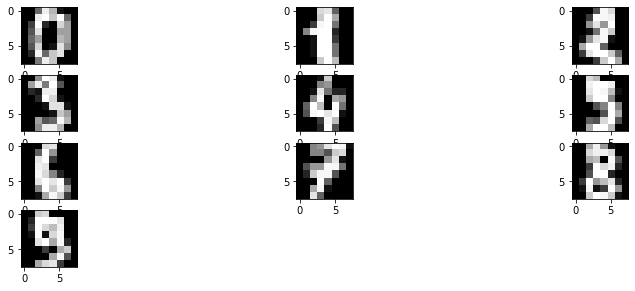

In [71]:
plt.figure(figsize=(14,11))
for k in range (0,10):
    plt.subplot(9,3,k+1)
    plt.imshow(images[k],cmap='Greys_r')

In [72]:
print(feature_names)
print(target_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
[0 1 2 3 4 5 6 7 8 9]


In [73]:
print(x.shape)
print(y.shape)
y.reshape(1797,1)

(1797, 64)
(1797,)


array([[0],
       [1],
       [2],
       ...,
       [8],
       [9],
       [8]])

In [74]:
data=pd.DataFrame(x)
target=pd.DataFrame(y)

In [75]:
data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


# model  

In [76]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.2)
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
model.score(x_test,y_test)

0.8916666666666667

In [77]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report,f1_score

In [79]:
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.89      0.96      0.93        26
           1       0.92      0.90      0.91        40
           2       0.94      0.91      0.93        34
           3       0.88      0.91      0.89        46
           4       0.91      0.83      0.87        36
           5       0.97      0.79      0.87        39
           6       0.85      1.00      0.92        28
           7       0.91      0.84      0.87        37
           8       0.82      0.88      0.85        32
           9       0.85      0.93      0.89        42

    accuracy                           0.89       360
   macro avg       0.89      0.90      0.89       360
weighted avg       0.90      0.89      0.89       360

